In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [3]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# datasets.mnist.load_data(): CIFAR dataset with TensorFlow, which splits it into a training set with 50,000 images and a testing set with 10,000 images.
# train_images: images used for training the model; 28x28 pixel grayscale representation of a handwritten digit (0-9).
# test_images: images used for testing the model

In [4]:
# Normalize pixel values: 
# This code rescales pixel values in train_images and test_images to the range of 0 to 1.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Add a channels dimension to image data for handling color channels in TensorFlow.
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# [height, width, color]

In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)  # Assuming 10 classes for classification
])

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
"""

First Convolutional Layer:
Input Size: 32x32x3 (Height x Width x Channels)
Number of Filters: 32
Convolutional Kernel Size: 3x3
Activation: ReLU
Output: Approximately 30x30x32

Max-Pooling Layer:
Pooling Window Size: 2x2
Output: Approximately 15x15x32

Second Convolutional Layer:
Input: 15x15x32
Filters: 64
Kernel Size: 3x3
Activation: ReLU
Output: Approximately 13x13x64

Max-Pooling Layer:
Pooling Size: 2x2
Output: Approximately 6x6x64

Third Convolutional Layer:
Input: 6x6x64
Filters: 64
Kernel Size: 3x3
Activation: ReLU
Output: Approximately 4x4x64

"""

'\n\nFirst Convolutional Layer:\nInput Size: 32x32x3 (Height x Width x Channels)\nNumber of Filters: 32\nConvolutional Kernel Size: 3x3\nActivation: ReLU\nOutput: Approximately 30x30x32\n\nMax-Pooling Layer:\nPooling Window Size: 2x2\nOutput: Approximately 15x15x32\n\nSecond Convolutional Layer:\nInput: 15x15x32\nFilters: 64\nKernel Size: 3x3\nActivation: ReLU\nOutput: Approximately 13x13x64\n\nMax-Pooling Layer:\nPooling Size: 2x2\nOutput: Approximately 6x6x64\n\nThird Convolutional Layer:\nInput: 6x6x64\nFilters: 64\nKernel Size: 3x3\nActivation: ReLU\nOutput: Approximately 4x4x64\n\n'

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# SparseCategoricalCrossentropy: labels are not continuous.
# from_logits=True: indicates that the model’s output values are raw, unnormalized scores (logits), and the loss function will apply the softmax activation function to convert these logits into probability distributions.

In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3551 - loss: 1.7449 - val_accuracy: 0.5728 - val_loss: 1.2022
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5882 - loss: 1.1638 - val_accuracy: 0.6177 - val_loss: 1.0636
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6599 - loss: 0.9781 - val_accuracy: 0.6713 - val_loss: 0.9372
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6923 - loss: 0.8771 - val_accuracy: 0.6909 - val_loss: 0.8820
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7214 - loss: 0.7913 - val_accuracy: 0.6893 - val_loss: 0.8903
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7402 - loss: 0.7377 - val_accuracy: 0.7093 - val_loss: 0.8547
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7602 - loss: 0.6884 - val_accuracy: 0.7182 - val_loss: 0.8277
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7757 - 

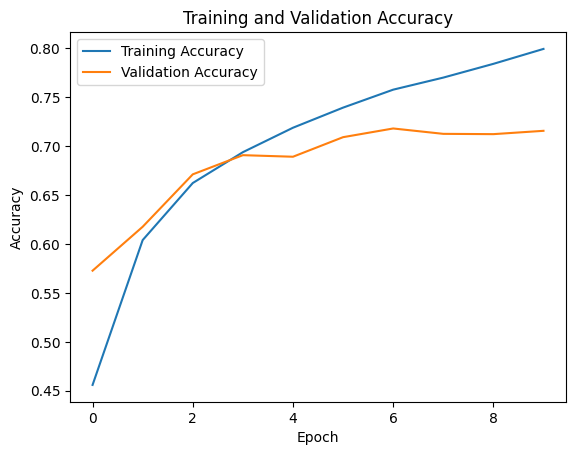

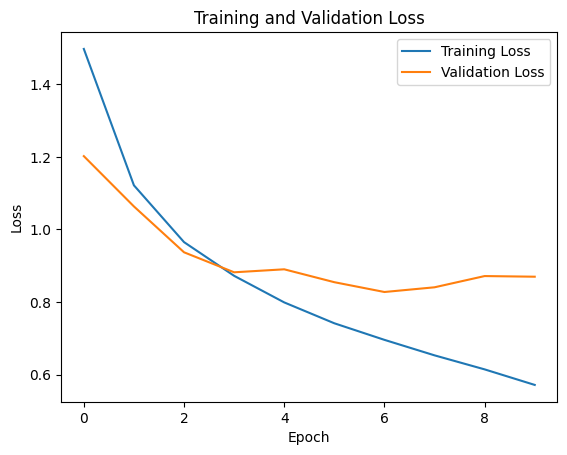

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Test the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 5ms/step - accuracy: 0.7158 - loss: 0.8699

Test accuracy: 0.7157999873161316


In [12]:
# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
# Make predictions
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


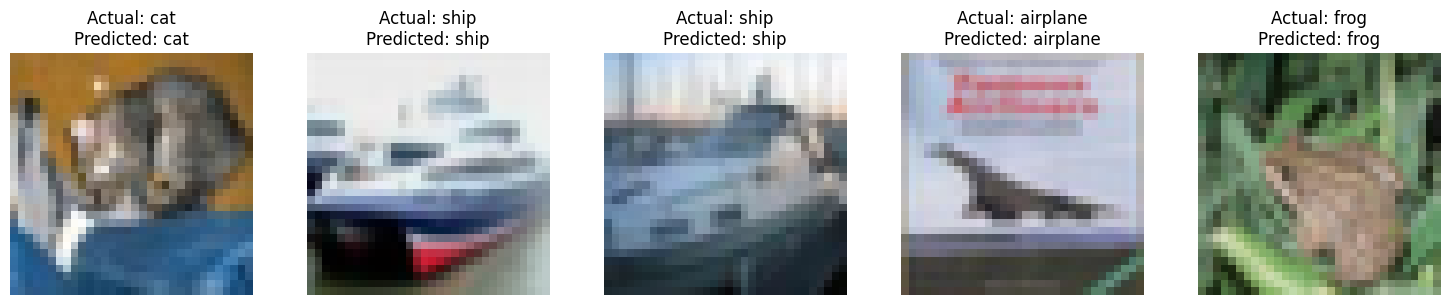

In [17]:
# Assuming test_images is correctly loaded with shape (num_images, 32, 32, 3) for RGB images
num_images_to_visualize = 5

plt.figure(figsize=(15, 3))
for i in range(num_images_to_visualize):
    plt.subplot(1, num_images_to_visualize, i + 1)
    
    # Ensure image data is in correct format (height, width, channels)
    image = test_images[i]
    
    # Remove any extra dimensions if present
    if image.ndim == 4 and image.shape[3] == 1:
        image = np.squeeze(image, axis=3)
    
    # Display the image with correct colormap
    plt.imshow(image)
    
    plt.title(f"Actual: {class_names[test_labels[i][0]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()